#### 문제 1.

당신은 매일 아침 동네 빵집에서 식빵을 구입해 왔다.

이 식빵의 무게는 500g이라고 표시되어 있다. 하지만 당신은 자신이 구매하는 빵이 500g이 맞는지 의구심이 들기 시작한다. 그래서 1개월간 식빵을 사운 뒤 매일 무게를 기록하였고 그 결과는 아래의 데이터와 같다.

https://data.hossam.kr/E02/bread.xlsx

1개월간 측정한 빵의 평균 무게는 495.3g이었다. 이 값을 가지고 식빵의 무게가 500g이 되지 않는다며 베이커리를 찾아가 컴플레인을 해야 할까?

#### 데이터 가져오기

In [7]:
from pandas import read_excel
from scipy.stats import t
from matplotlib import pyplot as plt
import seaborn as sb
from scipy import stats
import sys
from math import sqrt

In [2]:
df = read_excel('https://data.hossam.kr/E02/bread.xlsx')
df

,무게
0,495
1,496
2,502
3,494
4,499
5,501
6,493
7,494
8,495
9,501


### p-value의 기준

- `P-value < 0.01` : 귀무가설이 옳을 확률이 `0.01` 이하 → 틀렸다(깐깐한 기준) --> 대립가설 채택
- `P-value < 0.05` : 귀무가설이 옳을 확률이 `0.05` 이하 → 틀렸다(일반적인 기준) --> 대립가설 채택
- `0.05 < P-value < 0.1` : 애매한 경우(샘플링을 다시한다)
- `0.1 < P-value` : 귀무가설이 옳을 확률이 0.1 이상 → 틀리지 않았다(맞다와 다름)

#### 귀무 가설
 - 1개월 간 측정한 빵의 평균 무게는 495.3g이다

In [11]:
result = stats.ttest_1samp(df['무게'], 495.3)
result

TtestResult(statistic=0.10264907939120813, pvalue=0.918948021354656, df=29)

#### 결과 해석

  - 귀무가설이 틀리지 않았다

#### 귀무 가설

  - 빵의 무게가 500보다 작다

In [10]:
result1 = stats.ttest_1samp(df['무게'], 500, alternative='less')
result1

TtestResult(statistic=-7.134111017689359, pvalue=3.753329744544767e-08, df=29)

#### 결과 해석

  - 귀무 가설을 채택하고 빵의 무게는 500g 이하가 맞다

In [13]:
clevel = 0.95
n = len(df['무게'])
dof = n -1
smaple_mean = df['무게'].mean()
sample_std = df['무게'].std(ddof = 1)
sample_std_error = sample_std / sqrt(n)
cmin , cmax = t.interval(clevel, dof, loc = smaple_mean, scale = sample_std_error)

#### 시각화

In [14]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

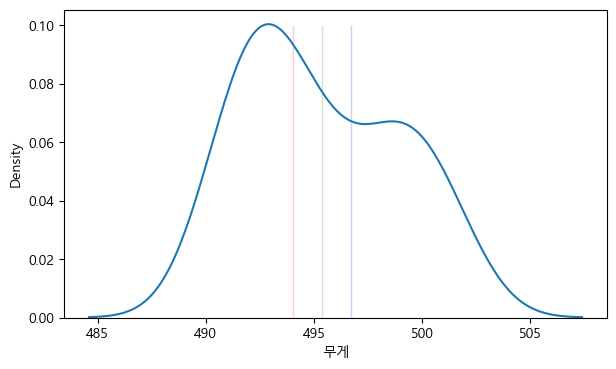

In [18]:
sb.kdeplot(data=df, x='무게')
sb.lineplot(x=[cmin, cmin], y=[0, 0.1], color='red')
sb.lineplot(x=[cmax, cmax], y=[0, 0.1], color='blue')
sb.lineplot(x= smaple_mean, y =[0, 0.1], color='green')
plt.show()
plt.close()

#### 결론

 - 식빵 무게의 평균 495.3g은 신뢰구간 95%에 속한다. 식빵 무게 500g보다 작기 때문에 컴플레인을 걸 수 있는 근거 자료가 될 수 있을 것이다.